In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cleaning of the Input file
We are going to analize the files and clean  that we have created in the part 1
Let us first select the first created file.

In [16]:
#Preprocessed image rgb color - no image filters
file_name = "preprocessed_training_data-1.npy"
#file_name = "training_data-1.npy"

In [17]:
#Processed image single color
#file_name = "processed_training_data-1.npy"

In [18]:
# full file info
train_data = np.load(file_name,allow_pickle=True)

In [19]:
# This file has the following shape
train_data.shape
#(500, 2)

(500, 2)

In [20]:
#train_data

In [21]:
type(train_data )

numpy.ndarray

The the first  input frames are presented as:

In [22]:
#train_data[#][1 inputs]
#train_data[#][0 images]

In [23]:
train_data[0][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [24]:
train_data[1][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [25]:
train_data[2][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

There are 29 input componentes for each frame, we can plot the histogram for each component

In [26]:
train_data.shape

(500, 2)

In [27]:
train_hist = train_data[:]

In [28]:
train_hist.shape

(500, 2)

In [75]:
train_hist[1][1].ndim  # The input is Unidmensinal

1

In [77]:
train_hist[1][0].ndim  # The image is 3 dimensional

3

In [29]:
df = pd.DataFrame()
for i in range(len(train_hist)):
    row=list(train_hist[i][1])    # Unidimensional mapping of inputs
    #print(row)   
    temp = pd.DataFrame([row])
   # print(temp)
    df = pd.concat([df, temp])
  

In [30]:
df=df.reset_index(drop=True)

In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We can analize the train data

In [32]:
#df_test = pd.DataFrame({'a':[1,0,0,1,3], 'b':[0,0,1,0,1], 'c':[0,0,0,0,0]})

In [33]:
#df_test

In [34]:
#(df_test == 0).astype(int).sum(axis=1)

In [35]:
#(df_test == 0).astype(int).sum(axis=0)

In [36]:
(df != 0).astype(int).sum(axis=0)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8     500
9       0
10      0
11      0
12    456
13     27
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
dtype: int64

In [37]:
#We count rows different to zero
(df[13] != 0).astype(int).sum(axis=0)

27

In [38]:
num_bins = 25
samples_per_bin = 100
hist, bins = np.histogram(df[13], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5

total data: 500


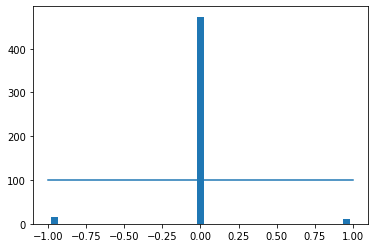

In [39]:
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df[13]), np.max(df[13])), (samples_per_bin, samples_per_bin))
print('total data:', len(df[13]))

In [40]:
from sklearn.utils import shuffle

In [41]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [42]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(df[13])):
        serie=df[13].iloc[[i]]
        ls = serie.tolist()
        if ls[0] >= bins[j] and ls[0] <= bins[j+1]:
            list_.append(i)      
    #list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

In [43]:
print('removed:', len(remove_list))

removed: 373


In [44]:
df_removed=df.drop(remove_list, axis=0, inplace=False)

In [45]:
#We count rows different to zero
(df_removed[13] != 0).astype(int).sum(axis=0)

27

In [46]:
#You can delete a list of rows from Pandas by passing the list of indices to the drop() method.
#remove_list is the index of the rows you want to delete
#axis=0 denotes that rows should be deleted from the dataframe
#inplace=True performs the drop operation in the same dataframe

In [47]:
df.drop(df.index[remove_list], inplace=True)
print('remaining:', len(df))

remaining: 127


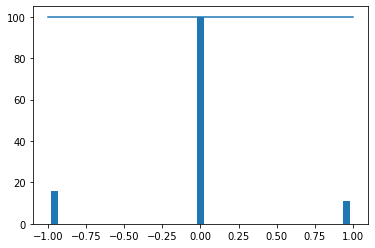

In [48]:
hist, _ = np.histogram(df[13], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df[13]), np.max(df[13])), (samples_per_bin, samples_per_bin))

In [49]:
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
472,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
480,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Cleaning of the Image array

The purpose of this section is select the image arrays that corresponds to the selected input choosed in the previous section.

In [96]:
#Let us  find the shape of the array
train_hist[1][0].shape

(270, 480, 3)

In [97]:
#To find the number of dimensions of the array
train_hist[1][0].ndim

3

We have seen that the images are 3 dimensionalm,  use the one to one mapping into dataframes may be not the solution to create dataframes

In [98]:
#To find the total number of elements in the array
train_hist[1][0].size

388800

In [99]:
type(train_hist[1][0])

numpy.ndarray

In [100]:
train_hist[1][0].ndim

3

In [101]:
train_hist[1][0].shape

(270, 480, 3)

In [119]:
rowa=list(train_hist[1][0])  # This mapping gives one dimensional shape .
# We need keep (270, 480, 3)!

In [120]:
len(rowa)

270

In [128]:
type(rowa)

list

In [129]:
# This trick convert list to numpy array

In [130]:
arr = np.asarray(rowa)

In [131]:
arr.shape

(270, 480, 3)

In [132]:
arr.ndim

3

In [133]:
arr

array([[[16, 11, 56],
        [12,  4,  9],
        [11,  8, 16],
        ...,
        [14,  2, 10],
        [14,  2, 10],
        [13,  2,  9]],

       [[10,  2,  5],
        [11,  3,  8],
        [11,  3,  9],
        ...,
        [15,  2, 11],
        [14,  2, 10],
        [13,  2, 10]],

       [[10,  3,  8],
        [11,  3,  8],
        [11,  2,  5],
        ...,
        [15,  2, 11],
        [15,  2, 11],
        [13,  2, 10]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

We have seen that mapping array to list we lost the shape

In [151]:
df_image = pd.DataFrame()
for i in range(len(train_hist)):
    row=list(train_hist[i][0]) # For images  Here we lost the (i, 480, 3) shape
    #print(row)    
    temp = pd.DataFrame([row])
  
   # print(temp)
    df_image = pd.concat([df_image, temp])
df_image=df_image.reset_index(drop=True)
df_image_removed=df_image.drop(remove_list, axis=0, inplace=False)
df_image_clean=df_image_removed.reset_index(drop=True)
df_image_clean.shape

(127, 270)

In [135]:
df_image_clean.head(1)

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,"[[228, 176, 98], [228, 176, 98], [228, 175, 98...","[[230, 176, 99], [230, 176, 99], [230, 176, 99...","[[231, 178, 100], [231, 177, 100], [231, 177, ...","[[232, 179, 101], [232, 178, 101], [232, 178, ...","[[233, 180, 102], [233, 179, 102], [233, 179, ...","[[235, 181, 104], [234, 180, 104], [234, 180, ...","[[235, 182, 105], [235, 182, 105], [235, 181, ...","[[237, 183, 107], [236, 182, 106], [236, 182, ...","[[237, 184, 108], [237, 184, 108], [237, 183, ...","[[238, 186, 113], [238, 184, 109], [238, 184, ...",...,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [..."


In [141]:
df_image_clean.head(1).T

,0
0,"[[228, 176, 98], [228, 176, 98], [228, 175, 98..."
1,"[[230, 176, 99], [230, 176, 99], [230, 176, 99..."
2,"[[231, 178, 100], [231, 177, 100], [231, 177, ..."
3,"[[232, 179, 101], [232, 178, 101], [232, 178, ..."
4,"[[233, 180, 102], [233, 179, 102], [233, 179, ..."
...,...
265,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [..."
266,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [..."
267,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [..."
268,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [..."


In [143]:
df_image_clean.head(1).T.to_numpy().shape

(270, 1)

In [144]:
df_image_clean.head(1).to_numpy().shape

(1, 270)

In [152]:
df_image_clean=df_image_clean.T.to_numpy()

In [153]:
df_image_clean.shape

(270, 127)

In [154]:
df_image_clean.ndim

2

In [58]:
#train_data[#][1 inputs]
#train_data[#][0 images]

In [71]:
df_image_clean=df_image_clean.to_numpy()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
#image_paths = np.asarray(image_path)
#steerings = np.asarray(steering)

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(df_image_clean, df, test_size=0.2, random_state=6)

In [77]:
#from sklearn.model_selection import train_test_split

In [78]:
#train, test = train_test_split(df, test_size=0.2)

In [79]:
#train.shape

In [80]:
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(y_valid)))

Training Samples: 101
Valid Samples: 26


Text(0.5, 1.0, 'Validation set')

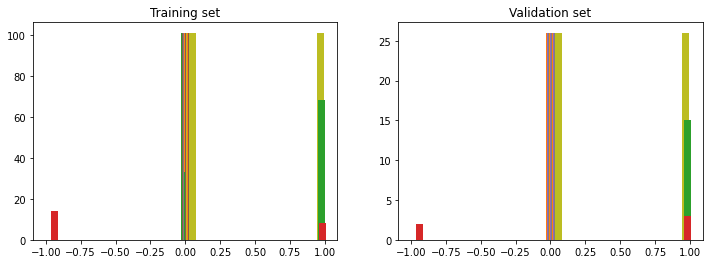

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05)
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05)
axes[1].set_title('Validation set')

In [82]:
X_train.shape

(101, 270)

In [83]:
y_train

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
54,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
87,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#X_image.shape
#(450, 270, 480, 3)

In [85]:
type(X_train)

numpy.ndarray

In [ ]:
## Train Image part

In [87]:
X_image =X_train

In [88]:
X_image.shape
#(450, 270, 480, 3)

(101, 270)

In [89]:
X_image[0]

array([array([[248, 215, 163],
              [249, 214, 159],
              [248, 212, 157],
              ...,
              [244, 226, 202],
              [243, 222, 195],
              [237, 197, 133]], dtype=uint8),
       array([[250, 218, 172],
              [249, 216, 167],
              [249, 215, 162],
              ...,
              [245, 227, 204],
              [245, 227, 205],
              [242, 219, 186]], dtype=uint8),
       array([[251, 221, 177],
              [250, 219, 175],
              [250, 219, 173],
              ...,
              [246, 228, 207],
              [245, 229, 207],
              [245, 226, 201]], dtype=uint8),
       array([[251, 223, 182],
              [251, 223, 183],
              [251, 222, 182],
              ...,
              [246, 229, 208],
              [246, 230, 209],
              [245, 230, 209]], dtype=uint8),
       array([[251, 224, 185],
              [251, 224, 185],
              [251, 224, 184],
              ...,
        